### This is a file for the machine learning analysis of an example dataset
The analysis is available at [Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

There are 3 data sets included:
* **diabetes _ 012 _ health _ indicators _ BRFSS2015.csv** is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables
* **diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv** is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.
* **diabetes _ binary _ health _ indicators _ BRFSS2015.csv** is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

In [48]:
# Import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
# Read in the data
datapath = "/home/katalitf/Documents/conferences/NBD_22_workshop/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
data_in = pd.read_csv(datapath)
data_in.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [9]:
data_in.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
# Select a subset of the data to work with
data_continuous = data_in[[
    "Diabetes_binary",
    "BMI",
    "Age",
    "Education"]]
data_continuous.head()

,Diabetes_binary,BMI,Age,Education
0,0.0,26.0,4.0,6.0
1,0.0,26.0,12.0,6.0
2,0.0,26.0,13.0,6.0
3,0.0,28.0,11.0,6.0
4,0.0,29.0,8.0,5.0


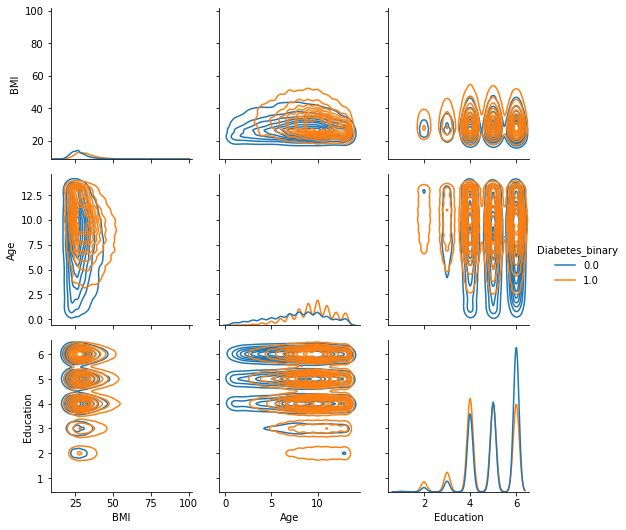

In [16]:
# Visualize the dataset subset
data_gridplot = sns.PairGrid(data_continuous, hue="Diabetes_binary")
data_gridplot.map_diag(sns.kdeplot)
data_gridplot.map_offdiag(sns.kdeplot)
data_gridplot.add_legend()

In [18]:
# Split the predictors and the outcome
y = data_continuous[["Diabetes_binary"]]
X = data_continuous[[
    "BMI",
    "Age",
    "Education"]]

In [19]:
# Separate the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2)

In [24]:
print(f"The shape of the predictors (data) is: {X.shape}")
print(f"The shape of the training predictor set is: {X_train.shape}")
print(f"The shape of the test predictor set is: {X_test.shape}")
print(f"The shape of the outcome set is: {y.shape}")
print(f"The shape of the training outcome set is: {y_train.shape}")
print(f"The shape of the test outcome set is: {y_test.shape}")

The shape of the predictors (data) is: (70692, 3)
The shape of the training predictor set is: (56553, 3)
The shape of the test predictor set is: (14139, 3)
The shape of the outcome set is: (70692, 1)
The shape of the training outcome set is: (56553, 1)
The shape of the test outcome set is: (14139, 1)


<AxesSubplot:>

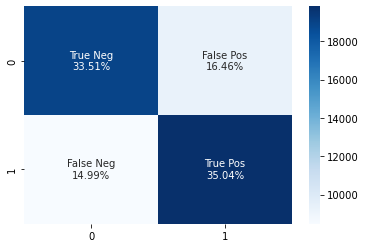

In [53]:
# Predict using logistic regression
logit_model = LogisticRegression(penalty="l2")
logit_model.fit(X_train, y_train.values.ravel())
y_pred = logit_model.predict(X_train)
cf_matrix = confusion_matrix(y_train.values.ravel(), y_pred)

# print confusion matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

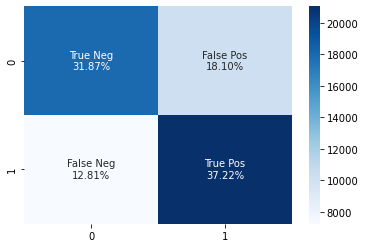

In [55]:
# Predict using random forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_depth=5)
rf_model.fit(X_train, y_train.values.ravel())
y_pred = rf_model.predict(X_train)
cf_matrix = confusion_matrix(y_train.values.ravel(), y_pred)

# print confusion matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
# Predict using SVM
svm_model = SVC(
    kernel = "rbf",
    degree = 3,
    gamma = "scale")
svm_model.fit(X_train, y_train.values.ravel())
y_pred = svm_model.predict(X_train)
cf_matrix = confusion_matrix(y_train.values.ravel(), y_pred)

# print confusion matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')